## Purpose

As an international student studying in Seoul National University (SNU), I have always been asked by prospective students how many percentage of classes conducted in English. Most of the time, I feel pity that I cannot give them an exact number. At the same time, I know that there are not many choices for the minority like us to choose what classes we can take, but I never thought, or questioned about the amount of English classes provided in SNU. 

That is why I started this small research project. For current students, the research project will help them have a better understanding of their major and their department. For prospective students, or any candidates who are interested in applying to our university, I hope the project serves as a good reference to decide whether SNU is worthy enough and whether their Korean proficiency is enough to survive in an extremely competitive enviroment like SNU or not. I don't want to scare anyone out, but in the end, SNU is still a Korean national university. If you want to thrive in this environment, especially if you are undergraduate student, you have to ace Korean language. 

For now, I only do research about the current semester (2021, 2nd semester). In the future, I would like to work with data from the previous semester, as well as for previous years to fully visualize the academic environment in SNU. 


## Data preparation

### Import libraries and packages

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv("data.csv")
df = df.drop(['professor', 'location', 'remark', 'credits', 'sub-category'], axis=1)

### Clean and categorize the data

In [2]:
# Categorize colleges

def set_college(x):
    humanities = set(["College of Humanities", "Department of Korean Language and Literature", "Department of Chinese Language and Literature", "Department of English Language and Literature", "Department of French Language and Literature", "Department of German Language and Literature", "Department of Russian Language and Literature", "Department of Hispanic Language and Literature", "Department of Linguistics", "Department of Korean History", "Korean History Major", "Comparative Studies for East Asian Humanities", "Department of Asian History", "Department of Western History", "Department of Archaeology and Art History", "Archaeology Major", "Art History Major", "Department of Philosophy", "Oriental Philosophy Major", "Western Philosophy Major", "Philosophy, Politics and Economics", "Department of Religious Studies", "Department of Aesthetics", "Interdisciplinary Program in Western Classics", "Interdisciplinary Program in Cognitive Science", "Interdisciplinary Program in Comparative Literature", "Interdisciplinary Program in Performing Arts Studies", "Interdisciplinary Program in Archival Studies", "Japanese Language and Civilization Major", "Department of Asian Languages and Civilizations", "Interdisciplinary Program in Comparative Literature Major", "Combined Minor in Latin American Studies"])

    social_sci = set(["College of Social Sciences", "Department of Political Science and International Relations", "Political Science Major", "International Relations Major", "Department of Economics", "Department of Sociology", "Department of Anthropology", "Department of Psychology", "Department of Geography", "Department of Social Welfare", "Information and Multimedia Culture Major", "Department of Communication", "Interdisciplinary Program in Gender Studies", "Interdisciplinary Program in Peace and Unification Studies"])

    natural_sci = set(["College of Natural Sciences", "Department of Mathematical Sciences", "Department of Statistics", "Astronomy Program Major", "Physics Program Major", "Astronomy Major", "Department of Chemistry", "School of Biological Sciences", "Department of Earth and Environmental Sciences",  "Major of Science and Technology Studies", "Program in Computational Sciences", "Department of Brain and Cognitive Sciences", "Interdisciplinary Program in History and Philosophy of Science", "Interdisciplinary Program in Genetic Engineering", "Interdisciplinary Program in Brain Science", "Interdisciplinary Program in Bioinformatics", "Interdisciplinary Program in Computational Science and Technology", "Interdisciplinary Program in Biophysics and Chemical Biology"])

    nursing = set(["College of Nursing", "Department of Nursing", "Department of Clinical Nursing Science"])

    bussiness = set(["College of Business Administration", "Entrepreneurship", "Department of Business Administration"])

    engineering = set(["College of Engineering", "Department of Civil and Environmental Engineering", "Department of Materials Science and Engineering", "Department of Electrical and Computer Engineering", "System Semiconductor Engineering for AI", "Department of Energy Resources Engineering", "Department of Chemical and Biological Engineering", "Architecture Major", "Department of Architecture and Architectural Engineering", "Department of Industrial Engineering", "Technology Management Major", "Department of Nuclear Engineering", "Department of Naval Architecture and Ocean Engineering", "Integrated Major in Smart City Global Convergence", "Interdisciplinary Program in Technology Management Economics and Policy Major", "Interdisciplinary Program in Urban Design Major", "Interdisciplinary Program in Bioengineering", "Artificial Intelligence", "Department of Computer Science and Engineering", "Interdisciplinary Program in Space Systems", "Interdisciplinary Program in Artificial Intelligence", "Smart City Engineering Major", "Civil and Environmental Engineering Major", "Department of Civil and Environmental Engineering", "Energy Resources Engineering Major", "Nuclear Engineering Major", "Department of Aerospace Engineering", "Multiscale Mechanical Design Major", "Department of Mechanical Engineering"])

    agriculture = set(["College of Agriculture and Life Sciences", "Department of Plant Science", "Crop Science and Biotechnology Major", "Horticultural Science and Biotechnology Major", "Vocational Education and Work Force Development Major", "Department of Forest Sciences", "Forest Environmental Science Major", "Environmental Materials Science Major", "Global Environmental Management Major", "Department of Agriculture, Forestry and Bioresources", "Biomaterials Engineering Major", "Department of Applied Biology and Chemistry", "Applied Life Chemistry Major", "Applied Biology Major", "Department of Animal and Food Biotechnology","Animal and Food Biotechnology, Food Biotechnology Major", "Food and Animal Biotechnology, Animal Biotechnology Major", "Biomaterials Engineering Major", "Biomaterials Engineering Major", "Integrated Major in Global Smart Farm", "Biosystems Engineering Major", "Department of Landscape Architecture and Rural System Engineering","Landscape Architecture Major", "Rural Systems Engineering Major", "Integrated Major in Regional Studies and Spatial Analytics", "Regional Information Studies Major", "Agricultural and Resource Economics Major", "Department of FoodTech", "Biomodulation Major", "Department of Agricultural Biotechnology", "Department of Agricultural and Vocational Education", "Agricultural and Forest Meteorology Major", "Agricultural Genomics Major", "Rural System Engineering Major"])

    art = set(["College of Fine Arts", "Department of Oriental Painting", "Department of Painting", "Department of Sculpture", "Media Art Major", "Sculpture Major", "Design History and Culture", "Integrated Creative Design Minor", "Crafts Major", "Design Major", "Department of Crafts and Design", "Interdisciplinary Program in Art Management", "Department of Fine Art", "Oriental Painting Major", "Sculpture Major", "Painting Major", "Department of Craft", "Department of Design"])

    law = set(["Department of Law", "College of Law", "Law", "School of Law"])

    edu = set(["Mathematics Education Major", "Department of Mathematics Education", "College of Education", "Department of Education", "Department of Korean Language Education", "Department of English Language Education", "Department of French Language Education", "Department of German Language Education", "Department of Social Studies Education", "Social Studies Major", "History Major", "Social Studies Education Major", "Geography Major", "Department of History Education", "Department of Geography Education", "Department of Ethics Education", "Ethics Education Major", "Department of Mathematics Education", "Department of Physics Education", "Department of Chemistry Education", "Department of Biology Education", "Department of Earth Science Education", "Department of Physical Education", 
    "Department of AI Integrated Education", "Interdisciplinary Program in Music Education", "Interdisciplinary Program in Art Education", "Interdisciplinary Program in Home Economics Education", "Interdisciplinary Program in Special Education", "Interdisciplinary Program in Environment Education", "Interdisciplinary Program in Early Childhood Education",
    "Interdisciplinary Program in Global Education Cooperation", "French Major", "English Major", "German Major", "Physics Major", "Chemistry Major", "Biology Major", "Science Education Major", "Earth Science Major", "Integrated Social Studies", "Science Education Group", "Chemistry Education Major", "Biology Education Major", "Physics Education Major"])

    human_eco = set(["Child Development and Family Studies Major", "Consumer Science Major", "Department of Food and Nutrition", "Food and Nutrition Major", "Textiles, Merchandising and Fashion Design Major", "Department of Textiles, Merchandising and Fashion Design", "Department of Consumer Science", "Department of Child Development and Family Studies"])

    vet_med = set(["College of Veterinary Medicine", "Veterinary Clinical Sciences", "Department of Veterinary Medicine", "Pre-Veterinary Medicine Program"])

    pharm = set(["College of Pharmacy"])

    music = set(["College of Music", "Department of Vocal Music", "Department of Composition", "Theory Major", "Composition Major", "Piano Major", "String Major", "Woodwind and Percussion Major", "Department of Korean Music", "Department of Music", "Korean Music Major", "Instrumental Music(Piano, String, Wind) Major", "Composition and Conducting Major", 
    "Theory and Musicology Major"])

    medicine = set(["College of Medicine", "School of Medicine", "Preliminary Medicine Courses", "Anatomy Major", "Pediatrics Major", "Family Medicine Major", "Nuclear Medicine Major", "Thoracic and Cardiovascular Surgery Major", "Reconstructive Plastic Surgery Major", "Ophthalmology Major", "Medical Education Major", "Emergency Medicine Major", "Psychiatry Major", 
    "Department of Medicine", "Pathology Major", "Microbiology and Immunology Major", "Preventive Medicine Major", "History of Medicine and Medical Humanities Major", "Forensic Medicine Major", "Health Policy and Management Major", "Biomedical Engineering Major", "Internal Medicine Major", "Surgery Major", "Obstetrics and Gynecology Major",
    "Dermatology Major", "Orthopedic Surgery Major", "Thoracic and Cardiovascular Surgery Major", "Urology Major", "Otorhinolaryngology-Head and Neck Surgery Major", "Ophthalmology Major", "Radiology Major", "Anesthesiology and Pain Medicine Major", "Reconstructive Plastic Surgery Major", "Radiation Oncology Major", "Laboratory Medicine Major", 
    "Rehabilitation Medicine Major", "Translational Medicine Major", "Emergency Medicine Major", "Medical Education Major", "Tropical Medicine and Parasitology Major", "Integrated Major in Innovative Medical Science", "Department of Biomedical Sciences", "Department of Human Systems Medicine", "Department of Advanced Education for Clinician Scientists",
    "Department of Medical Device Development", "Interdisciplinary Program in Cancer Biology", "Interdisciplinary Program in Clinical Pharmacology and Therapeutics Major", "Interdisciplinary Program in Medical Informatics", "Interdisciplinary Program in Stem Cell Biology"])

    liberal_studies = set(["College of Liberal Studies", "Department of Liberal Studies"])

    dentistry = set(["College of Dentistry", "Department of Dentistry", "School of Dentistry", "Combined BS-DDS Programs"])

    grad_publicHealth = set(["Graduate School of Public Health", "Department of Public Health", "Department of Environmental Health Sciences", "Public Health Major", "Health Care Management and Policy Major", "Environmental Health Major"])

    grad_publicAdmin = set(["Graduate School of Public Administration", "Department of Public Administration", "Department of Public Policy", "Department of Public Enterprise Policy", "Global Public Administration Major"])

    grad_enviStudies = set(["Graduate School of Environmental Studies", "Department of Environmental Planning", "Department of Landscape Architecture", "Interdisciplinary Program in Landscape Architecture", "Environmental Planning Major", "City and Regional Planning Major", "Environmental Management Major", "Transportation Studies Major",
    "Urban and Social Innovation Major", "Environmental Landscape Architecture Major", "Urban Environmental Design Major"])

    grad_intlStudies = set(["Graduate School of International Studies", "Department of International Studies", "International Commerce Major", "International Cooperation Major", "International Area Studies Major", "Korean Studies Major"])

    grad_convSciTech = set(["Graduate School of Convergence Science and Technology", "Department of Mathematical Information Science", "Department of Applied Bioengineering", "Department of Intelligence and Information", "Department of Health Science and Technology", "Molecular Medicine and Biopharmaceutical Sciences Major", "Department of Molecular Medicine and Biopharmaceutical Sciences"])

    fcty_liberalstdy = set(["Faculty of Liberal Education"])

    grad_intlAgrTech = set(["Graduate School of International Agricultural Technology", "Department of International Agricultural Technology"])

    grad_engPractice = set(["Graduate School of Engineering Practice", "Department of Engineering Practice", "Engineering Practice Major"])

    grad_dataSci = set(["Graduate School of Data Science", "Department of Data Science", "Data Science Major"])

    rotc = set(["R.O.T.C."])

    gradSchool = set(["Graduate School"])

    if x["department"] in humanities:
        return "Humanities"
    elif x["department"] in social_sci:
        return "Social Sciences"
    elif x["department"] in natural_sci:
        return "Natural Sciences"
    elif x["department"] in nursing:
        return "Nursing"
    elif x["department"] in bussiness:
        return "Business Administration"
    elif x["department"] in engineering:
        return "Engineering"
    elif x["department"] in agriculture:
        return "Agriculture and Life Sciences"
    elif x["department"] in art:
        return "Fine Arts"
    elif x["department"] in law:
        return "Law"
    elif x["department"] in edu:
        return "Education"
    elif x["department"] in human_eco:
        return "Human Ecology"
    elif x["department"] in vet_med:
        return "Veterinary Medicine"
    elif x["department"] in pharm:
        return "Pharmacy"
    elif x["department"] in music:
        return "Music"
    elif x["department"] in medicine:
        return "Medicine"
    elif x["department"] in liberal_studies:
        return "Liberal Studies"
    elif x["department"] in dentistry:
        return "Dentistry"
    elif x["department"] in grad_publicHealth:
        return "Graduate School of Public Health"
    elif x["department"] in grad_convSciTech:
        return "Graduate School of Convergence Science and Technology"
    elif x["department"] in grad_intlStudies:
        return "Graduate School of International Studies"
    elif x["department"] in grad_publicAdmin:
        return "Graduate School of Public Administration"
    elif x["department"] in grad_dataSci:
        return "Graduate School of Data Science"
    elif x["department"] in grad_engPractice:
        return "Graduate School of Engineering Practice"
    elif x["department"] in grad_enviStudies:
        return "Graduate School of Environmental Studies"
    elif x["department"] in grad_intlAgrTech:
        return "Graduate School of International Agricultural Technology"
    elif x["department"] in fcty_liberalstdy:
        return "Faculty of Liberal Education"
    elif x["department"] in rotc:
        return "R.O.T.C"
    elif x["department"] in gradSchool:
        return "Graduate School"
    else:
        return "Education" # for some weird reasons, the classes from "Department of Mathematics Education" are not assigned

df["College"] = df.apply(lambda x : set_college(x), axis = 1)
# df = df.set_index("College")
# df = df["College"]
# df

In [3]:
# Clean the year

df['year'] = df['year'].replace(to_replace={np.NaN: 0.0}, regex=True)
# df['year'].unique()

## General information about SNU 

### Colleges

In [4]:
# Understand SNU classes

df.College.value_counts()

Humanities                                                  1170
Engineering                                                  944
Natural Sciences                                             913
Medicine                                                     718
Music                                                        666
Education                                                    651
Social Sciences                                              429
Agriculture and Life Sciences                                395
Dentistry                                                    365
Fine Arts                                                    237
Faculty of Liberal Education                                 218
Law                                                          204
Business Administration                                      159
Pharmacy                                                     159
Veterinary Medicine                                          142
Human Ecology            

### Class categories

In [5]:
df.category.value_counts()

Elective Subject for Major            3269
Reading and Research                  2210
Subject for Liberal Education         1370
Requisite Subject for Major           1172
Subject for Teaching Certification      62
Elective General Subject                12
Core Subject for Liberal Education      10
Graduate Courses                         4
Name: category, dtype: int64

### Languages

In [6]:
df.language.value_counts()

Korean      7211
English      860
Chinese       11
German         9
French         7
Spanish        4
Japanese       4
Russian        3
Name: language, dtype: int64

As SNU is a Korean national university, it is no surprise that the majority of classes are conducted in Korean. However, I am surprised that there are classes conducted in other languages at SNU.

In [7]:
# Clean the language
def set_language(x):
    languages = set(["Chinese", "German", "French", "Spanish", "Japanese", "Russian"])
    if x['language'] in languages:
        return "Others"
    elif x['language'] == "Korean":
        return "Korean"
    return "English"

df['language'] = df.apply(lambda x : set_language(x), axis = 1)
# df['language'].nunique()

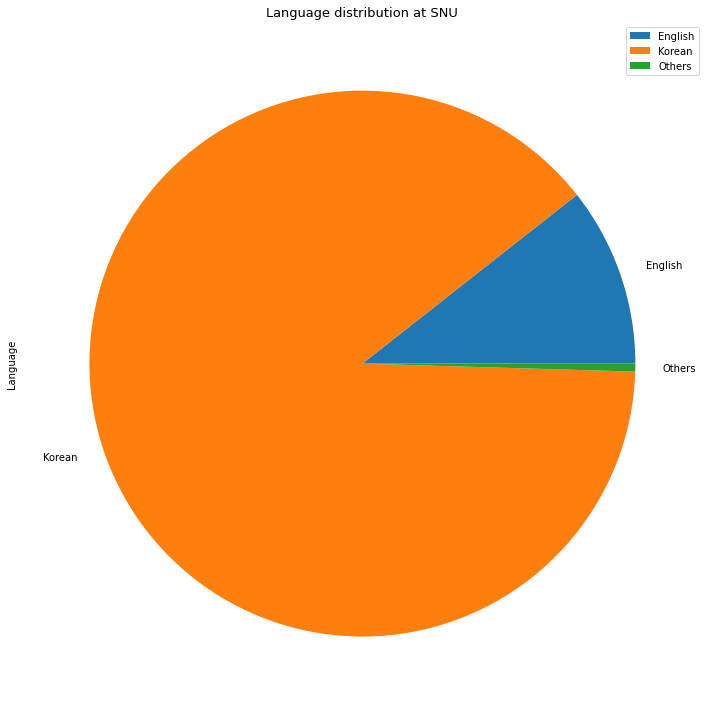

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(10,10))
df.groupby(["language"]).size().plot(kind="pie")
plt.title("Language distribution at SNU", fontsize=13)
plt.ylabel("Language")
plt.legend(loc='best')

plt.tight_layout()
outfold = "res/general/language.jpg"
plt.savefig(outfold)
plt.show()
plt.clf()

### Top 5 colleges that provide English classes

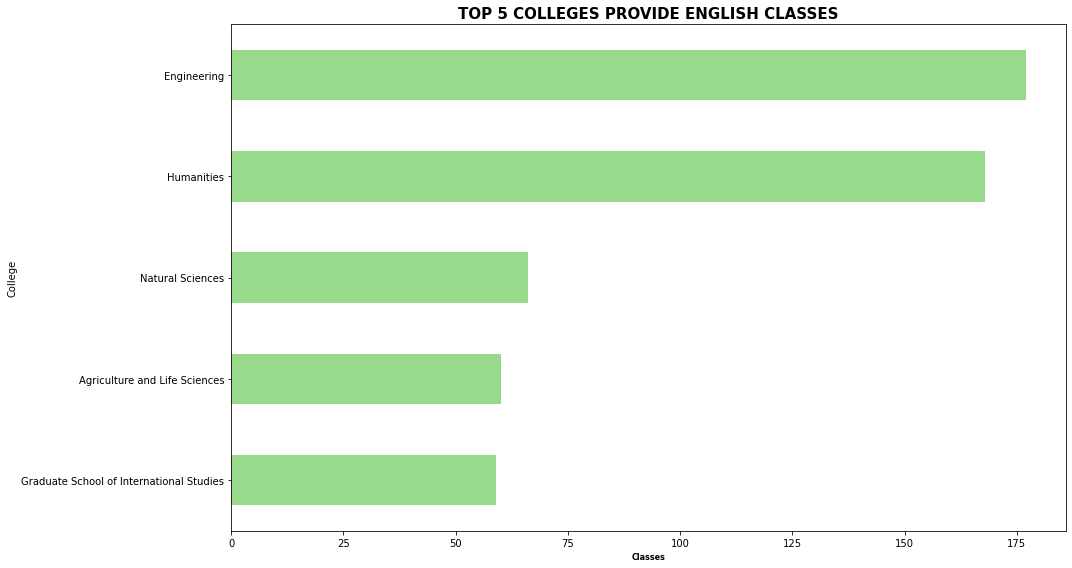

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(15,8))
temp = df.drop(["category", "level", "year", "id", "department"], axis=1)
graph = temp.loc[temp["language"] == "English"].groupby(["College"])["language"].count().fillna(0).\
    sort_values(ascending=False).head(5).sort_values(ascending=True).plot.barh(align='center', color="#99d98c")

plt.title("Top 5 colleges provide English classes".upper(), fontweight='black', fontsize=15)
plt.xlabel("Classes", fontweight='black', fontsize=8)

plt.tight_layout()
outfold = "res/general/top5colleges.jpg"
plt.savefig(outfold)
plt.show()
plt.clf()

As expected, STEM-related colleges are all on this list. I am also surprised that the College of Humanities is also on this list. I suspect that most English classes provided by the College of Humanities are from the Department of English Language and Literature.

### Top 10 departments that provide English classes

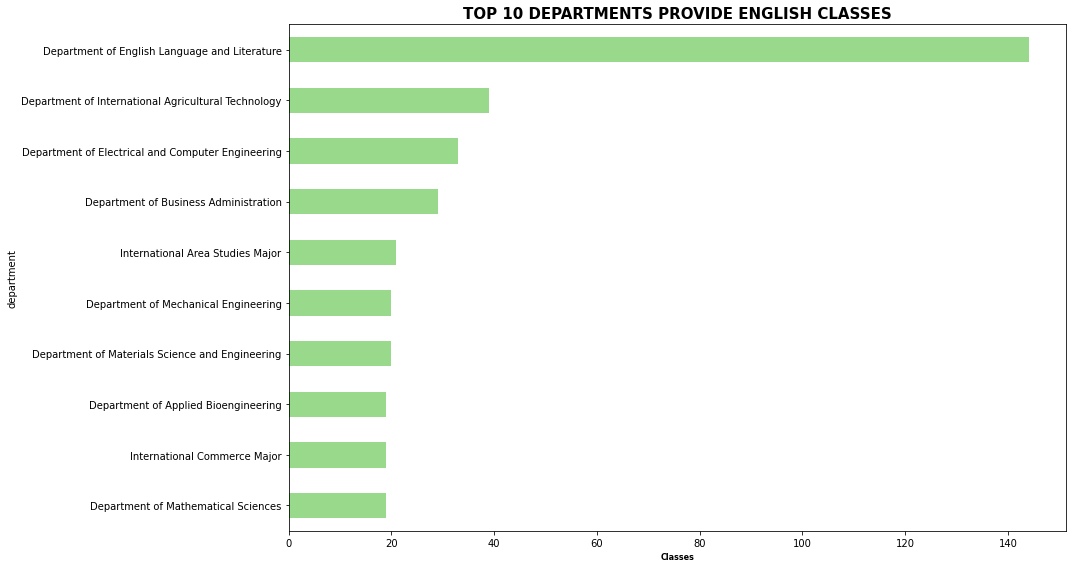

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize=(15,8))
temp = df.drop(["category", "level", "year", "id", "College"], axis=1)
# temp.loc[temp["language"] == "English"].groupby(["department"])["language"].count().fillna(0).\
#     sort_values(ascending=False).head(20).sort_values(ascending=True)
graph = temp.loc[temp["language"] == "English"].groupby(["department"])["language"].count().fillna(0).\
    sort_values(ascending=False).head(10).sort_values(ascending=True).plot.barh(align='center', color="#99d98c")

plt.title("Top 10 departments provide English classes".upper(), fontweight='black', fontsize=15)
plt.xlabel("Classes", fontweight='black', fontsize=8)

plt.tight_layout()
outfold = "res/general/top10departments.jpg"
plt.savefig(outfold)
plt.show()
plt.clf()

Let me explain a bit about the crawled data. Because of the way I crawl the data, the department information for ones that have several majors will be the major. For example, International Commerce Major and International Area Studies Major are all under the Department of International Studies. Instead of merging them into one department, the data explicitly separates them into different departments.

The above graph again affirms that most STEM departments have a considerable number of English classes. Besides STEM, there are a high number of English classes from the Graduate School of International Studies and the Department of Business Administration.

#### Top 10 departments that provide English classes (Undergraduate)

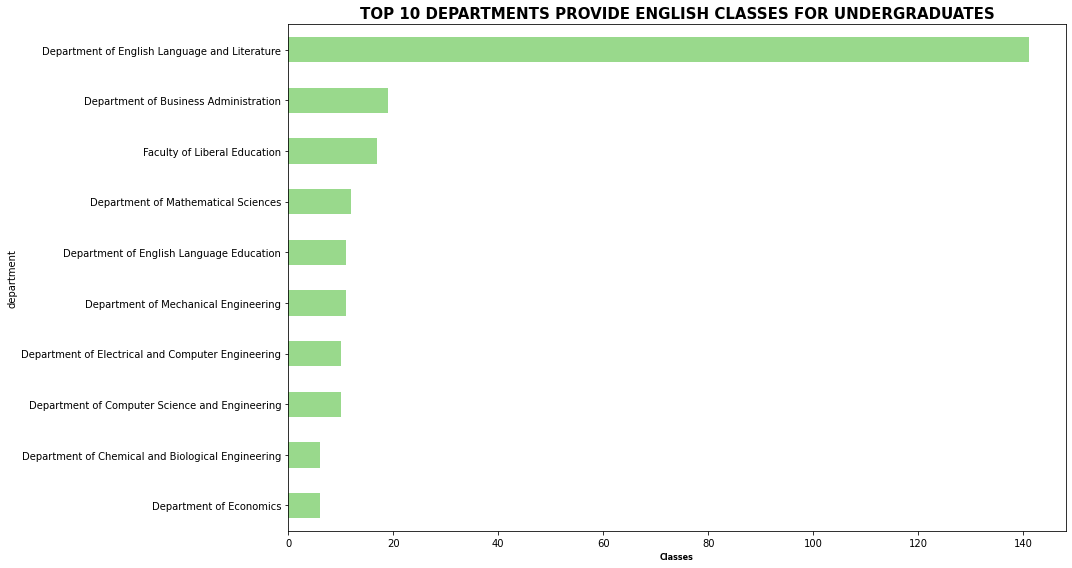

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(15,8))
temp = df.drop(["category", "year", "id", "College"], axis=1)
# temp.loc[temp["language"] == "English"].groupby(["department"])["language"].count().fillna(0).\
#     sort_values(ascending=False).head(20).sort_values(ascending=True)
graph = temp.loc[(temp["language"] == "English") & (temp["level"] == "Undergraduate")].groupby(["department"])["language"].count().fillna(0).\
    sort_values(ascending=False).head(10).sort_values(ascending=True).plot.barh(align='center', color="#99d98c")

plt.title("Top 10 departments provide English classes for Undergraduates".upper(), fontweight='black', fontsize=15)
plt.xlabel("Classes", fontweight='black', fontsize=8)

plt.tight_layout()
outfold = "res/general/top10departments_undergraduate.jpg"
plt.savefig(outfold)
plt.show()
plt.clf()

## Investigation

In [12]:
def customize_plot(df,component,level, title=""):
    if (title == ""):
        if "Department of" in component:
            title = 'English classes in {}'.format(component).upper()
        elif "Graduate School " in component:
            title = 'English classes in {}'.format(component).upper()
        elif "Faculty of " in component:
            title = 'English classes in {}'.format(component).upper()
        else:
            title = 'English classes in {} of {}'.format(level, component).upper()
    df.describe()
    temp_graph = df.div(df.sum(1)/100, axis=0)
    # temp_graph.language.value_counts().reset_index().sort([0,'index'], ascending=[False,True])
    # temp_graph.language.English.value_count().sort_values(ascending=False)
    # temp_graph = temp_graph.sort_values(['language'], ascending=False)
    # return temp_graph
    # graph = temp_graph.plot(kind="barh", stacked=False, figsize=(10,6), title=title, color=colors)
    # graph = temp_graph.plot(kind="pie", stacked=True, subplots=True, figsize=(10,6), title=title)
    plt.figure(figsize=(15,6))
    
    graph = temp_graph["English"].plot.barh(align='center', color="#99d98c")
    
    plt.title(title, fontsize=15, fontweight='black', color = '#333F4B')
    plt.xlabel("Percentage", fontsize=8, fontweight='black', color = '#333F4B')
    plt.ylabel('')
    plt.legend(loc='best')
    # for key,grp in temp_graph:
    #     plt.plot(grp[component1], label=key)

    outfile = "res/" + level + "/" + component.lower() + ".jpg"
    plt.tight_layout()
    plt.savefig(outfile)
    plt.show()
    plt.clf()


In [13]:
'''
Draw the graph showing how many percentage of English classes provided by each department. Then list five departments that have most English classes.
'''

def college_insight(college):
    college_info = df.loc[df["College"] == college]
    college_info = college_info.drop(['College'], axis=1)
    res = college_info.groupby(["level", "language", "category"]).size().unstack('language')
    customize_plot(res, college, "college")
    
    print("Top 3 departments that have English classes")
    # Top 3 departments that have English classes
    return college_info.loc[(college_info["language"] == "English")].groupby(["department"])["language"].count().fillna(0).\
    sort_values(ascending=False).head(3)

In [14]:
def department_insight(department, criteria1="level", criteria2="category"):
    full_dept = df[df["department"].str.contains(department, na=False)]
    full_dept = full_dept.drop(['department', 'College'], axis=1)
    # full_dept = full_dept.groupby(['language', criteria1]).size().unstack('language')
    full_dept = full_dept.groupby([criteria1, 'language', criteria2]).size().unstack(level=1)
    customize_plot(full_dept,department, "department")
    

### College

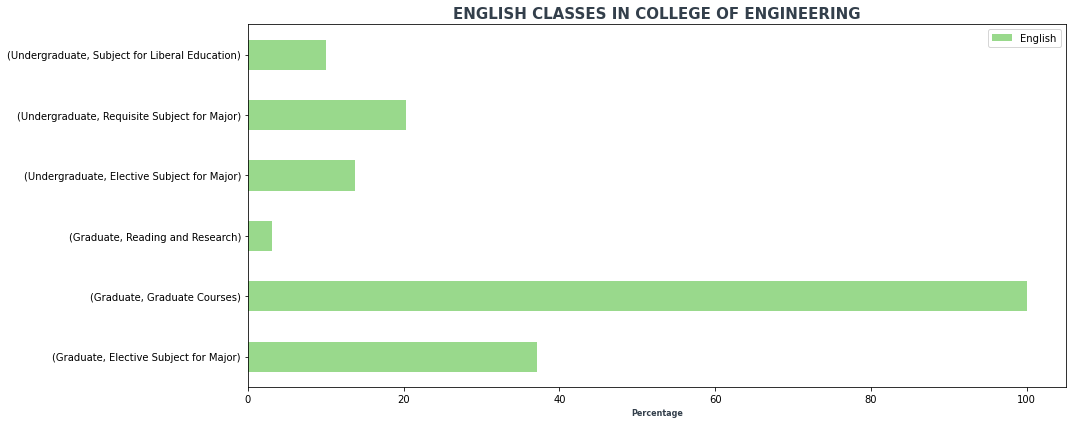

Top 3 departments that have English classes


department
Department of Electrical and Computer Engineering    33
Department of Mechanical Engineering                 20
Department of Materials Science and Engineering      20
Name: language, dtype: int64

<Figure size 432x288 with 0 Axes>

In [15]:
college_insight("Engineering")

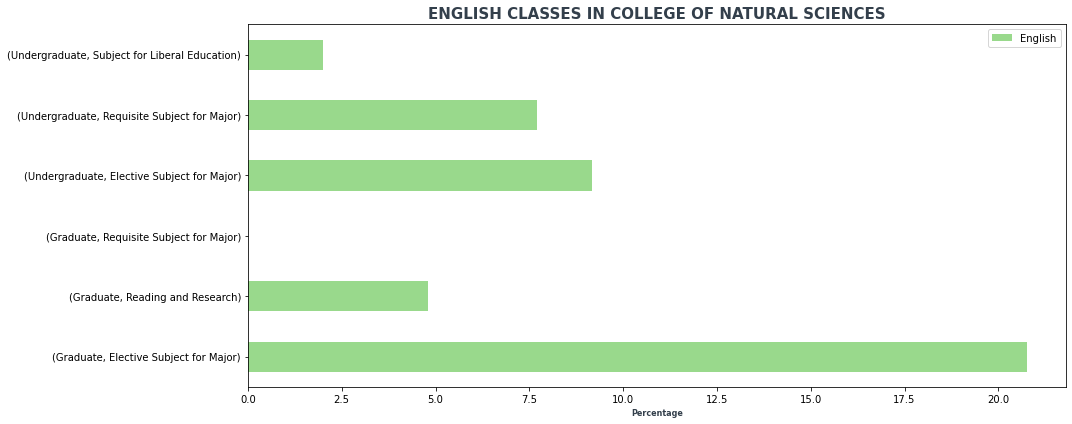

Top 3 departments that have English classes


department
Department of Mathematical Sciences               19
Department of Chemistry                           11
Department of Earth and Environmental Sciences     9
Name: language, dtype: int64

<Figure size 432x288 with 0 Axes>

In [16]:
college_insight("Natural Sciences")

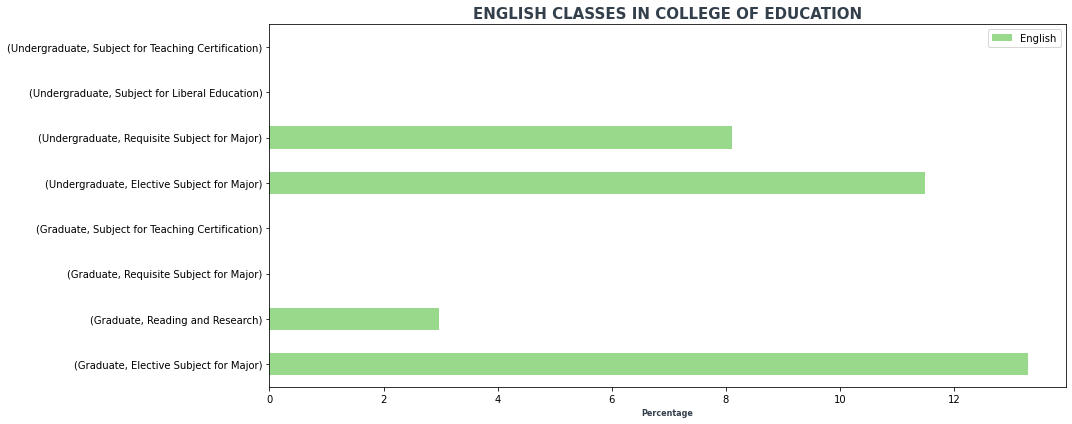

Top 3 departments that have English classes


department
Department of Physical Education                             14
Department of English Language Education                     11
Interdisciplinary Program in Global Education Cooperation     5
Name: language, dtype: int64

<Figure size 432x288 with 0 Axes>

In [17]:
college_insight("Education")

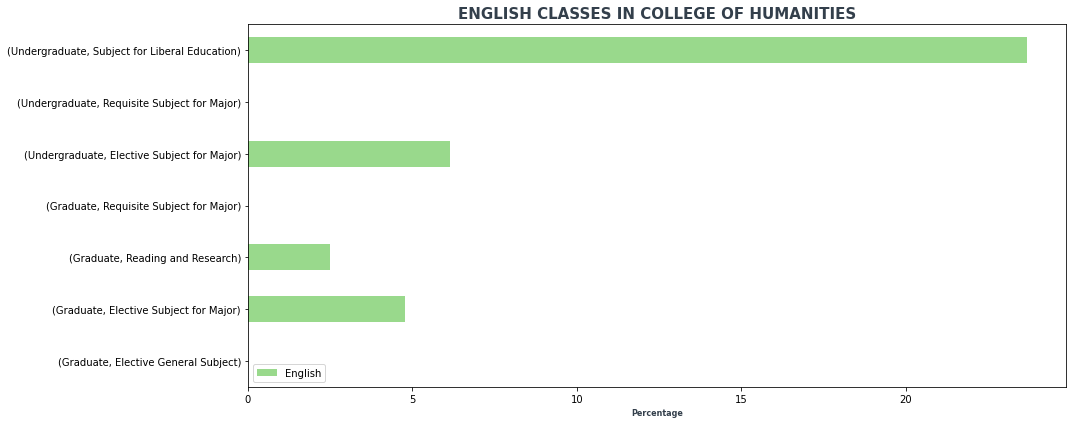

Top 3 departments that have English classes


department
Department of English Language and Literature    144
Department of Aesthetics                           5
Department of Linguistics                          4
Name: language, dtype: int64

<Figure size 432x288 with 0 Axes>

In [18]:
college_insight("Humanities")

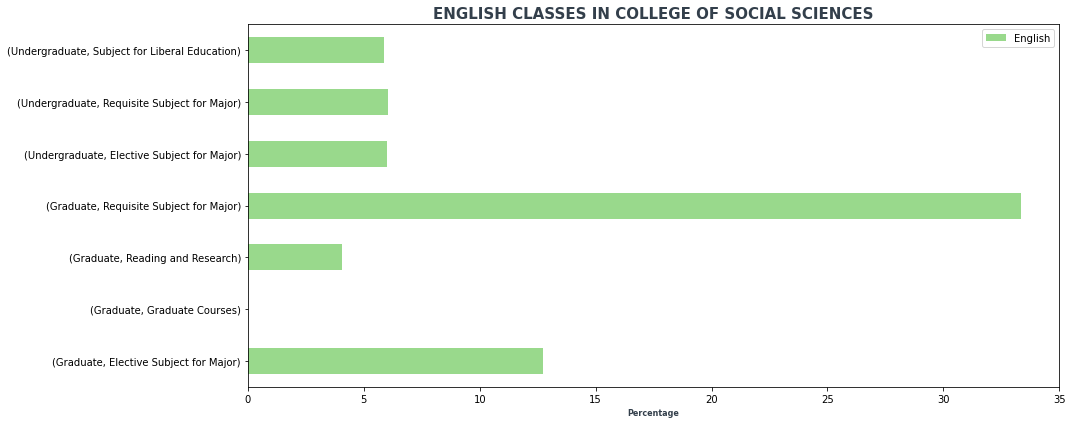

Top 3 departments that have English classes


department
Department of Economics          15
International Relations Major     5
Department of Geography           4
Name: language, dtype: int64

<Figure size 432x288 with 0 Axes>

In [19]:
college_insight("Social Sciences")

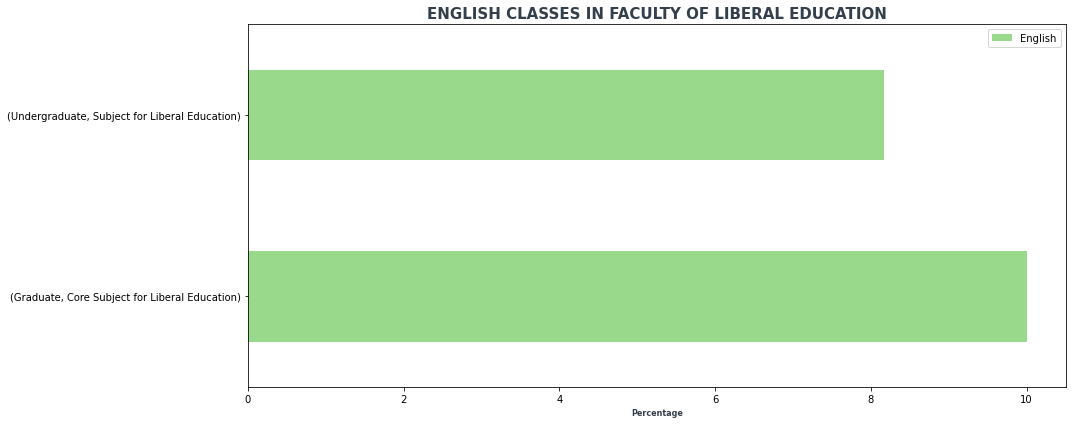

Top 3 departments that have English classes


department
Faculty of Liberal Education    18
Name: language, dtype: int64

<Figure size 432x288 with 0 Axes>

In [20]:
## Mandatory foundation classes (교양필수)
college_insight("Faculty of Liberal Education")

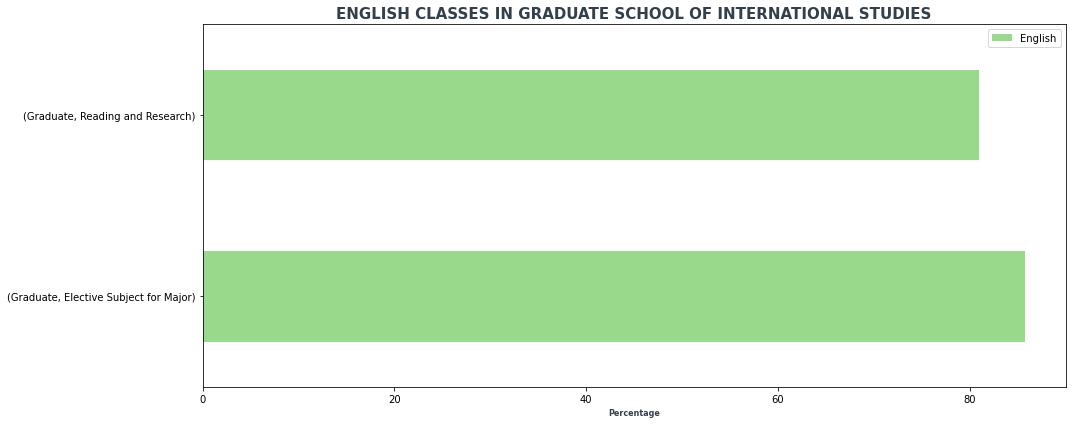

Top 3 departments that have English classes


department
International Area Studies Major    21
International Commerce Major        19
International Cooperation Major     11
Name: language, dtype: int64

<Figure size 432x288 with 0 Axes>

In [21]:
college_insight("Graduate School of International Studies")

### Department

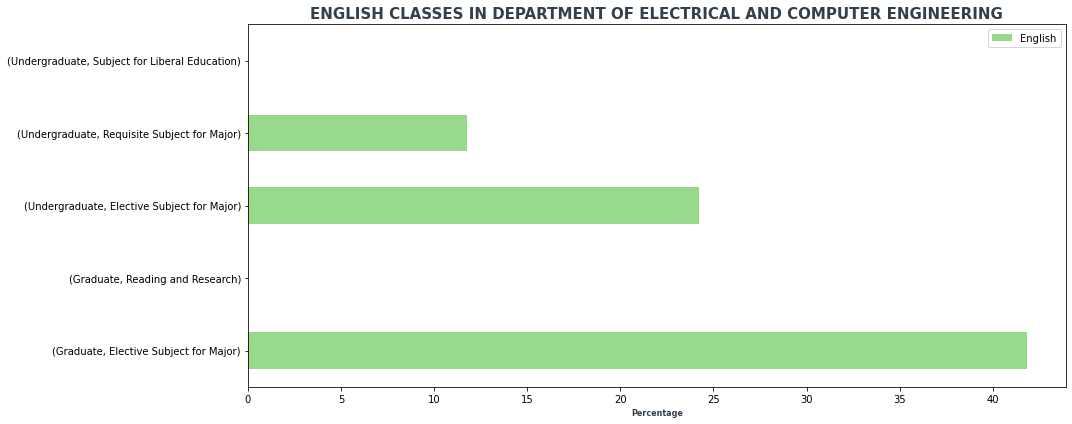

<Figure size 432x288 with 0 Axes>

In [22]:
department_insight("Electrical and Computer Engineering")

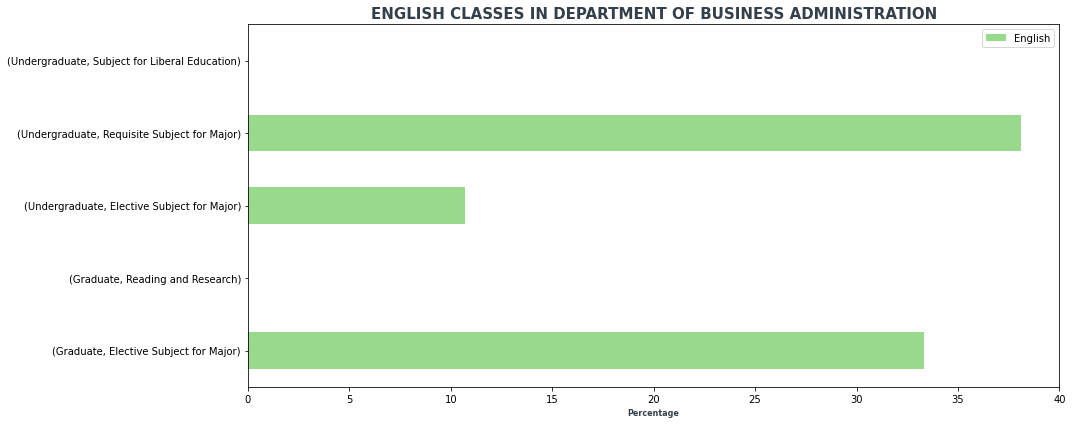

<Figure size 432x288 with 0 Axes>

In [23]:
department_insight("Business Administration")
# department_insight("level", "", "Business Administration")

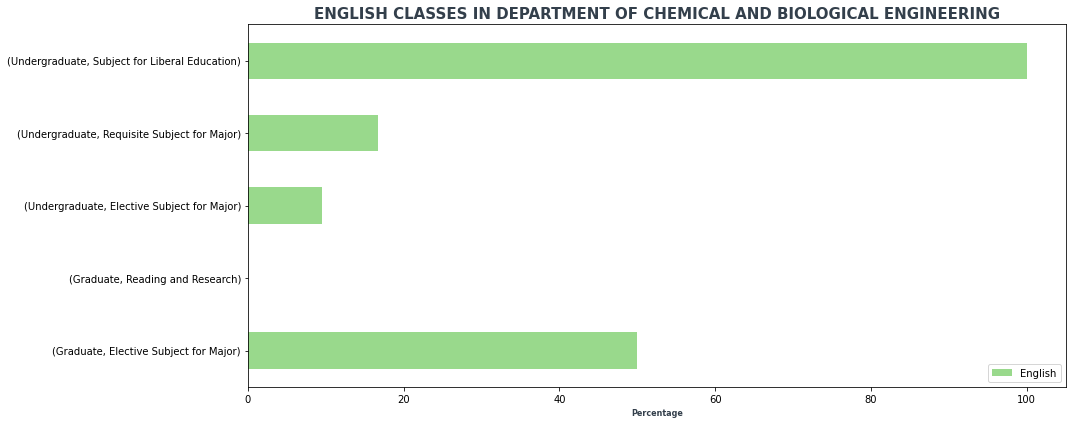

<Figure size 432x288 with 0 Axes>

In [24]:
department_insight("Chemical and Biological Engineering")

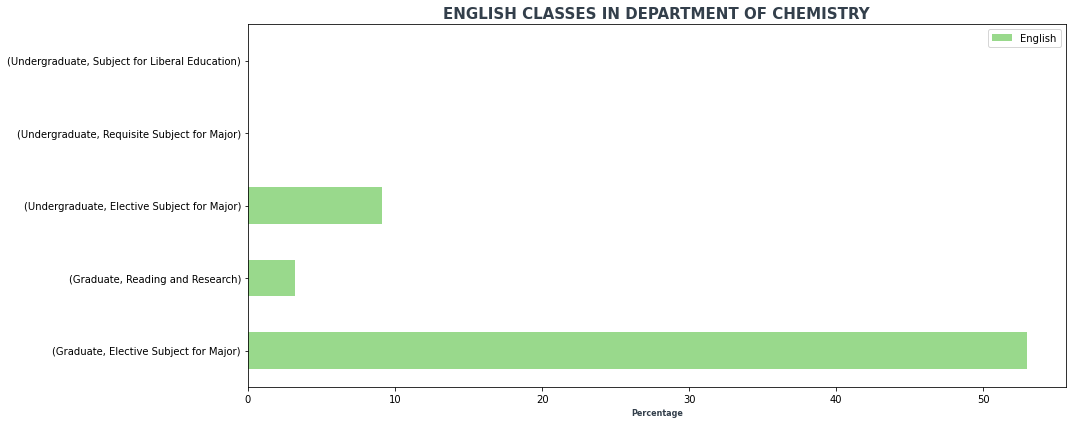

<Figure size 432x288 with 0 Axes>

In [25]:
department_insight("Department of Chemistry")

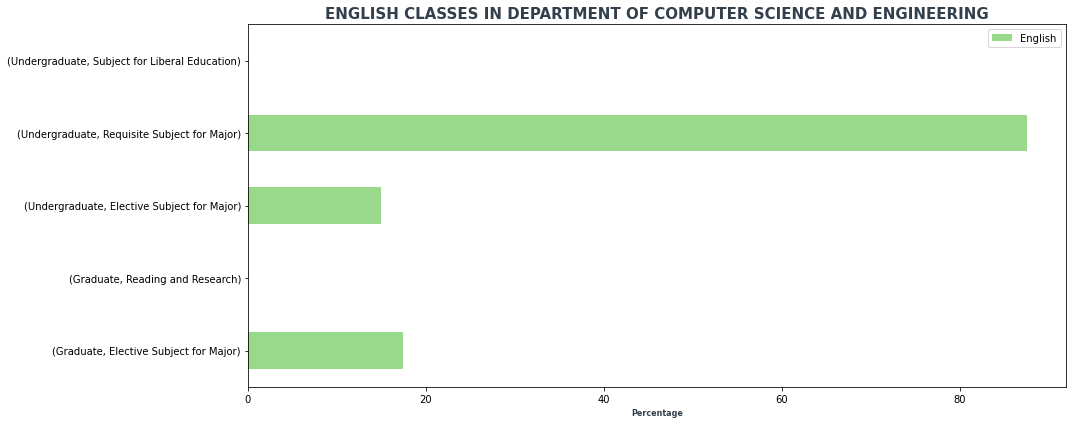

<Figure size 432x288 with 0 Axes>

In [26]:
department_insight("Computer Science and Engineering")

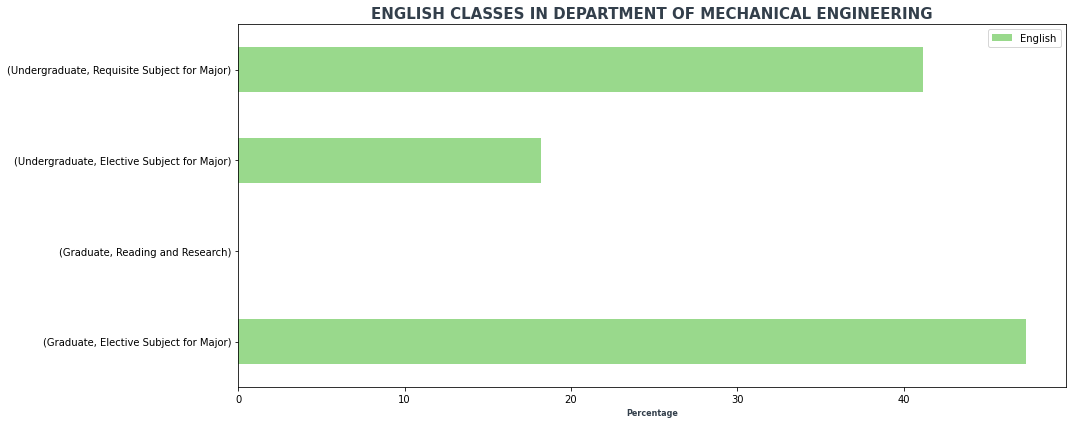

<Figure size 432x288 with 0 Axes>

In [27]:
department_insight("Mechanical Engineering")

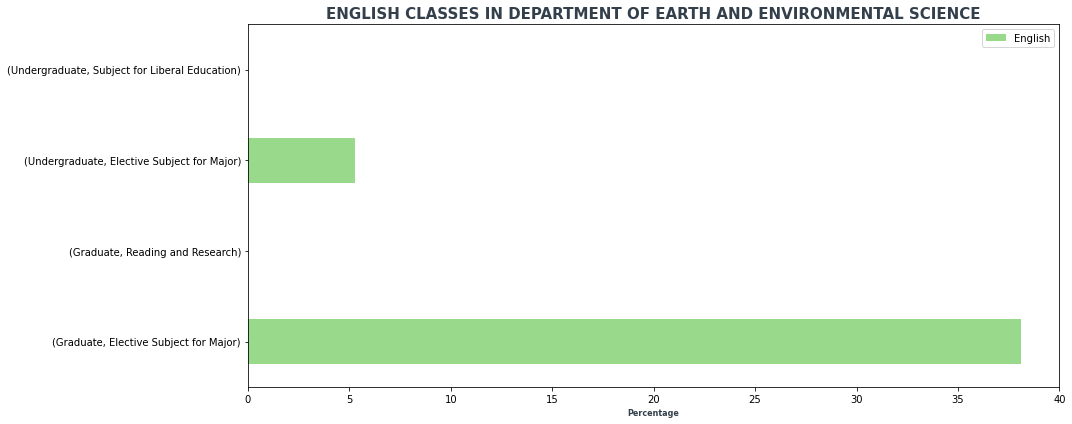

<Figure size 432x288 with 0 Axes>

In [28]:
department_insight("Earth and Environmental Science")

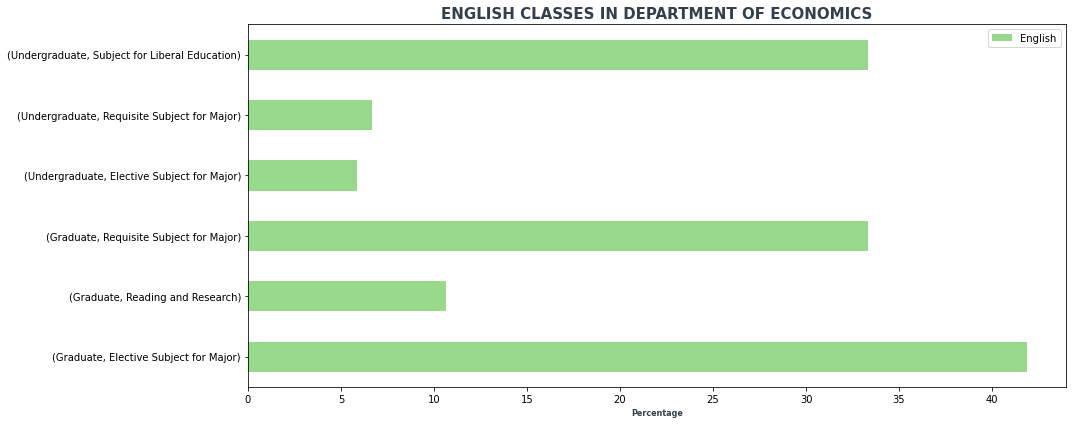

<Figure size 432x288 with 0 Axes>

In [29]:
department_insight("Economics")

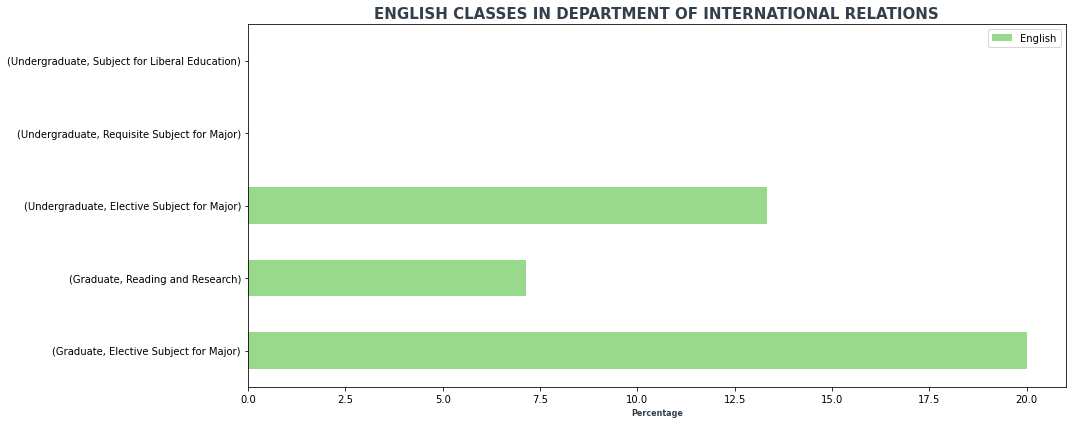

<Figure size 432x288 with 0 Axes>

In [31]:
department_insight("International Relations")

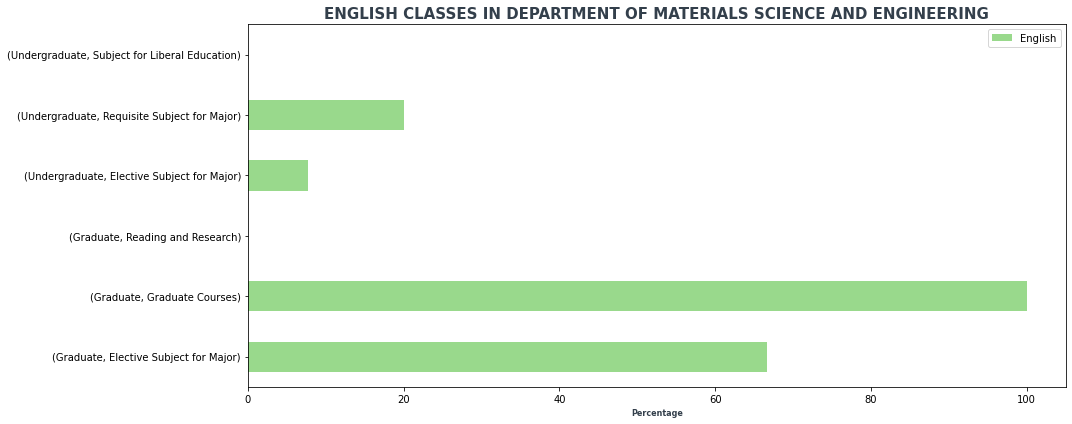

<Figure size 432x288 with 0 Axes>

In [30]:
department_insight("Materials Science and Engineering")

## Conclusion

From this project, I feel lucky that the majority of my major classes are conducted in English. Nevertheless, I still have to improve my Korean proficiency to take foundation and elective classes (sad reality). Although the project still needs some improvements, I hope SNU current students, or anyone who is interested in applying to SNU, find this project helpful and have a better understanding of their program. :)

This project cannot be done without the help of Huyen Chip's [repository](https://github.com/chiphuyen/just-pandas-things/), Pandas documentation, various posts on [TowardsDataScience](https://towardsdatascience.com) and [StackOverflow](https://stackoverflow.com/) (obviously!). Thanks to this project, my skills at Python libraries (Pandas, Matplotlib for data analysis and visualization and BeautifulSoup, Selenium for web crawling), and Jupyter Notebook has been cultivated. 
